In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

<h3>train_set_x_orig  训练特征</h3>
<h3>train_set_y     训练标签</h3>
<h3>test_set_x_orig   测试特征</h3>
<h3>test_set_y      测试标签</h3>
<h3>classes        类别
</h3>

In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [3]:
print(train_set_x_orig.shape)
print(train_set_y.shape)
print(test_set_x_orig.shape)
print(test_set_y.shape)
print(classes.shape)

(209, 64, 64, 3)
(1, 209)
(50, 64, 64, 3)
(1, 50)
(2,)


y = [1], it's a 'cat' picture.


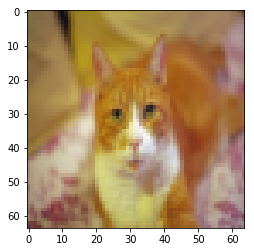

In [4]:
#查看其中图片
index = 24
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [5]:
#查看维度
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
#刚刚好是64*64.
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [6]:


#64*64*3，再转置，
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [7]:
#预处理。
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

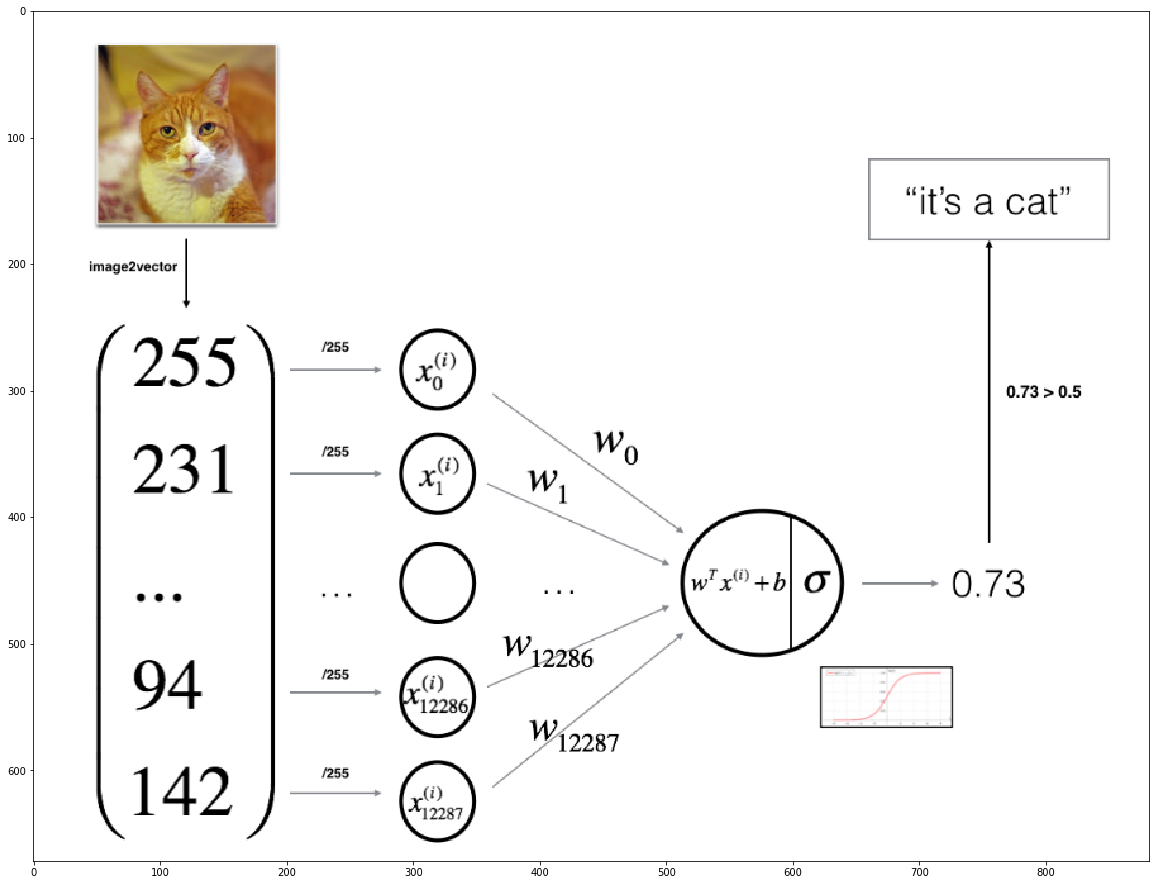

In [8]:
img=Image.open('images/逻辑.png')
plt.figure(figsize=(20,20))
plt.imshow(img)    

In [9]:
#计算sigmoid函数
def sigmoid(z):
    z=1/(1+np.exp(-z))
    return z

In [10]:
#查看输出
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(1) = " + str(sigmoid(1)))
print ("sigmoid(2) = " + str(sigmoid(2)))
print ("sigmoid(3) = " + str(sigmoid(3)))
print ("sigmoid(4) = " + str(sigmoid(4)))

sigmoid(0) = 0.5
sigmoid(1) = 0.7310585786300049
sigmoid(2) = 0.8807970779778823
sigmoid(3) = 0.9525741268224334
sigmoid(4) = 0.9820137900379085


In [11]:
#初始化权重，神经网络不可初始化为0，需要随机数值。
def initialize_with_zeros(dim):
    w=np.zeros(shape=(dim,1))
    b=0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    return w,b

In [12]:
dim = 2
w, b = initialize_with_zeros(dim)
print(w.shape)
print ("w = " + str(w))
print ("b = " + str(b))

(2, 1)
w = [[0.]
 [0.]]
b = 0


<h1>#公式推现图</h1>

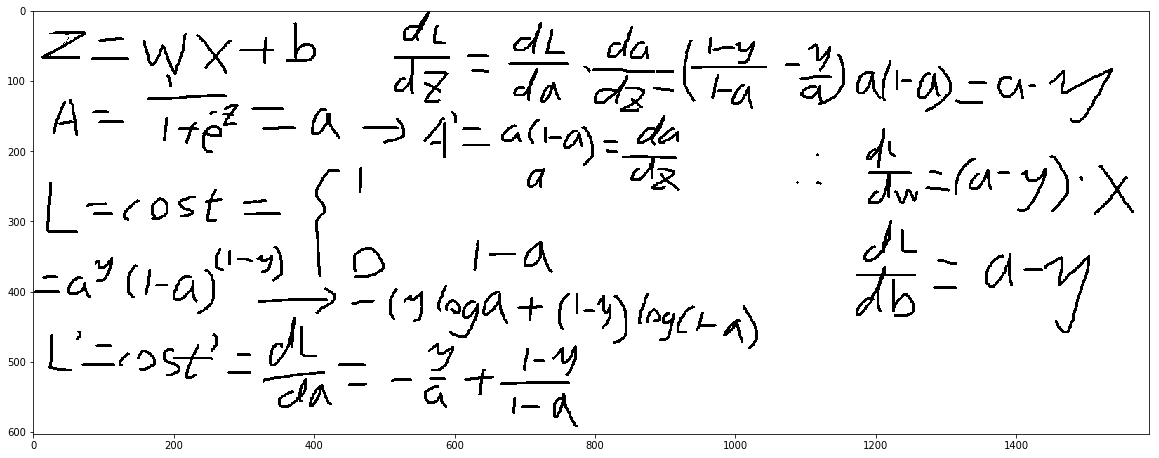

In [13]:
img=Image.open('images/数学推现.png')
plt.figure(figsize=(20,20))
plt.imshow(img)    

In [14]:
#根据上图推导求
def propagate(w, b, X, Y):
    
    #m为样本个数。
    m=X.shape[1]
    #相加后为一个值
    A=sigmoid(np.dot(w.T,X)+b)
#     print("A shape"+str(A.shape))
#     print(A)
    cost=-(1/m)*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))
    
    #多个值相加
    dw=(1/m)*np.dot(X,(A-Y).T)
    db=(1/m)*np.sum(A-Y)
    
#     print("dw shape"+str(dw.shape))
#     print("db shape"+str(db.shape))
    

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost
    
    
    
    
    

In [15]:
#查看一下
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
print("X shape"+str(X.shape))
print("X shape"+str(X.shape))
print("w shape"+str(w.shape))
print("Y shape"+str(Y.shape))
grads, cost = propagate(w, b, X, Y)

print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

X shape(2, 2)
X shape(2, 2)
w shape(2, 1)
Y shape(1, 2)
dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [16]:
#多次迭代
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs=[]
    for i in range(num_iterations):
        
        grads,cost=propagate(w,b,X,Y)
        dw=grads["dw"]
        db=grads["db"]
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))            
    params = {"w": w,
              "b": b}    
    grads = {"dw": dw,
             "db": db}
    return params, grads, costs
    

In [17]:
#查看一下
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [18]:
#预测
def predict(w, b, X):
    m=X.shape[1]
    y_pre=np.zeros(shape=(1,m))
    
    z=np.dot(w.T,X)+b
    A=sigmoid(z)
    
    for i in range(A.shape[1]):
        if(A[0,i]>=0.5):
            y_pre[0,i]=1
        else:
            y_pre[0,i]=0
            
    assert(y_pre.shape == (1, m))
    
    return y_pre       

In [19]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


In [20]:
#initialize_with_zeros    propagate    optimize    predict
#集合
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w,b=initialize_with_zeros(X_train.shape[0])
    
    
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    #100-差值，即准确率.
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
    
    

In [21]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


In [22]:
classes[int(d["Y_prediction_test"][0,5])]

b'cat'

y = 1, you predicted that it is a "b'cat'" picture.


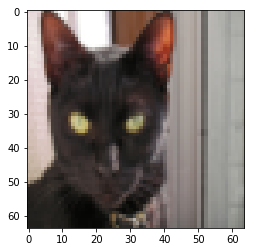

In [23]:
#查看一下
index = 9
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

print("y = " + str(test_set_y[0, index])+ ", you predicted that it is a \"" +str(classes[int(d["Y_prediction_test"][0,5])])+"\" picture.")

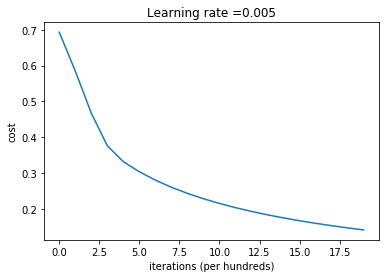

In [24]:
# 0.005下的cost迭代
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



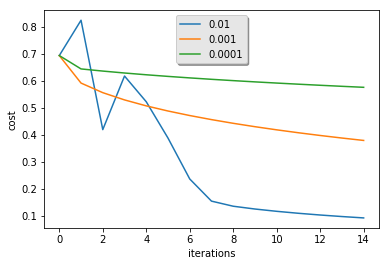

In [25]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

D:\soft\conda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
D:\soft\conda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':
D:\soft\conda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


y = 0.0, your algorithm predicts a "non-cat" picture.


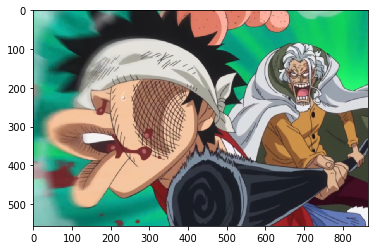

In [27]:

#放一张自己的图片
my_image = "luffy.jpg"   
##

# 预测图片是否有猫
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

y = 1.0, your algorithm predicts a "cat" picture.


D:\soft\conda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
D:\soft\conda\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


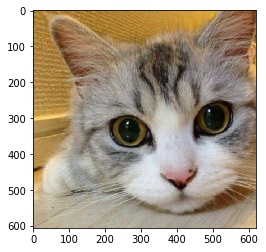

In [29]:

#放一张自己的图片
my_image = "猫.png"   
##

# 预测图片是否有猫
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px, num_px)).reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")